<img src="images/ceppe-smartdatascience.png" alt="CEPPE" style="width: 500px;"/>

# Computación interactiva con Jupyter Notebook

![Jupyter](images/jupyter_logo.png)

* **Jupyter Notebook es un entorno de programación interactivo en el navegador**
* Esto supone una nueva forma de programar
* Se originó a partir de IPython, allá por el 2001
* A día de hoy es independiente del lenguaje (**40 kernels diferentes**)

## Entonces ... ¿qué es un notebook?

¡Esto que estás viendo es un notebook!

**Prueba a hacer doble click sobre esta frase** ¡Tranquil@! no pasa nada. Si quieres que todo vuelva a estar como antes solo tienes que pulsar sobre este botón en la barra superior<center><img style="height: 40px" src="images/play.png"></center>

Como has podido ver, al hacer doble click sobre una *celda* puedes editar el contenido. Las celdas pueden contener:

* texto como el que estás viendo,
* ecuaciones escritas en $\LaTeX$ como:

$$ E=mc^2 $$
$$ f(t)=U_{\infty}\text{·}\left((t-t_{0})\text{·}e^{-i\alpha}+\frac{R^{2}}{t-t_{0}}\text{·}e^{i\alpha}\right)+\frac{i\Gamma}{2\pi}\text{·}ln(t-t_{0})=\Phi+i\Psi $$

* imágenes

 <center><img src="images/python_xkcd.png" /></center>
 
 * y lo más importante: *código* que puede ser modificado y ejecutado en la celda

In [1]:
# puedes hacer click en la celda modificarla y
# ejecutarla dando al play o utilizando el atajo
# shift + enter

print('Helo world')

Helo world


Puedes elegir el tipo de celda (texto, código, títulos...) en la barra superior, utilizando el desplegable en el que pone: `Markdown`, `Code` ...

* Si el resultado de ejecutar una celda es una imagen o gráfica, se mostrará en el notebook:

In [2]:
# importamos el módulo de pintar
%matplotlib inline
import matplotlib.pyplot as plt

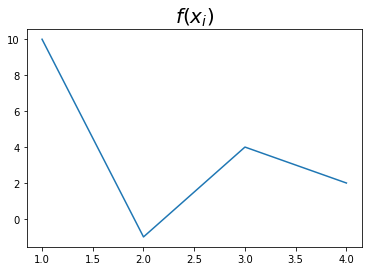

In [3]:
plt.plot([1, 2, 3, 4], [10, -1, 4, 2])

plt.title('$f(x_i)$', fontsize=20);

* Por último, el notebook nos da la posibilidad de exportarlo a otros formatos (html, pdf, tex...) con `jupyter nbconvert` de manera que podamos enseñarle una versión estática a alguien que no tenga Python.

## y es interactivo...

Y esto quiere decir que puedes crear widgets como deslizadores y cajas de selección de manera muy sencilla para explorar tu problema:

In [4]:
# sympy es una librería de cálculo simbólico
from sympy import init_printing, Symbol, Eq, factor

init_printing(use_latex=True)

In [5]:
x = Symbol('x')
x

Creemos ahora una función que factorice la expresión 
$$x^n - 1$$

In [6]:
def factorit(n):
    return Eq(x**n-1, factor(x**n-1))

In [7]:
factorit(3)

¿Pero qué pasa si queremos variar $n$ todo el rato?

In [8]:
from ipywidgets import interact

In [9]:
interact(factorit, n=(2,20));

A Jupyter Widget

#### Otro ejemplo

In [10]:
import numpy as np

In [11]:
def frecuencias(f1=10.0, f2=100.0):
    max_time = 0.5
    n = 5000
    t = np.linspace(0, max_time, n)
    signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)
    
    plt.plot(t, signal, label="Señal")
    plt.xlabel("Tiempo ($t$)")
    plt.title("Dos frecuencias")
    plt.legend()

In [12]:
interact(frecuencias, f1=(1.0, 50.), f2=(10.0, 70.0));

A Jupyter Widget

# El ecosistema científico se articula en torno a un gran número de librerías y el notebook es de gran utilidad para interactuar con todas ellas

![first_layer](images/slides/slides-27.png)

###### Original: Jake Vanderplas - Python Data Science Stack

Hasta ahora hemos visto ejemplos utilzando las librerías de representación gráfica, `matplotlib`, y de cáclulo simbólico, `sympy`. Por último mostraremos un ejemplo de la librería de análisis de datos `pandas`

<center><img src="images/pandas_logo.png" width="500px"/></center>

In [13]:
import pandas as pd

In [14]:
data = pd.read_csv("data/GlobalLandTemperaturesByCountry.csv",
                   index_col='dt',
                   parse_dates=['dt'])

data.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [15]:
gby = data.groupby(by=[data.index.month, data.index.year]).mean()
gby.index.names = ['month', 'year']
gby = gby.reset_index()
gby.pivot(index='year', columns='month', values='AverageTemperature')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.184140,NaN
1744,NaN,NaN,NaN,8.661480,11.098360,14.927720,17.094300,NaN,13.324120,8.276640,4.759520,0.561040
1745,-1.777780,-1.052220,1.757880,6.620620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1750,0.299460,2.587000,5.369960,7.808700,11.992040,15.582240,19.180760,17.730680,13.613200,6.443980,NaN,-0.185140
1751,-0.660000,-2.323000,4.791240,6.770860,NaN,16.091160,18.113320,17.750100,12.805420,NaN,NaN,NaN


In [16]:
countries = pd.unique(data.Country)

def plot_temp(country):
    sel_items = (data.Country == country)
    data_ = data[sel_items]
    gby = data_.groupby(by=[data_.index.year]).mean()
    gby.index.names = ['year']
    gby.plot(alpha=0.8, y='AverageTemperature', figsize=(10, 3))

In [17]:
interact(plot_temp, country=countries);

A Jupyter Widget

---

In [18]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = 'style/style.css'
HTML(open(css_file, "r").read())